# Evaluation of Driver’s Reaction Time Measured in Driving Simulator 
## https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9099898/

In [28]:
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
from scipy.stats import norm

Datos obtenidos de la Figura 3 de la publicación.

![Reaction times of drivers](plots/figure3.jpg)

In [ ]:
d = [0.44, 0.46, 0.49, 0.50, 0.50, 0.60, 0.60, 0.62, 0.62, 0.65, 0.67, 0.68, 0.69, 0.70, 0.72, 0.73, 0.74, 0.76, 0.77, 0.79, 0.83, 0.85, 0.88, 0.89, 0.91, 0.95, 0.96, 0.96, 0.98, 1.01]

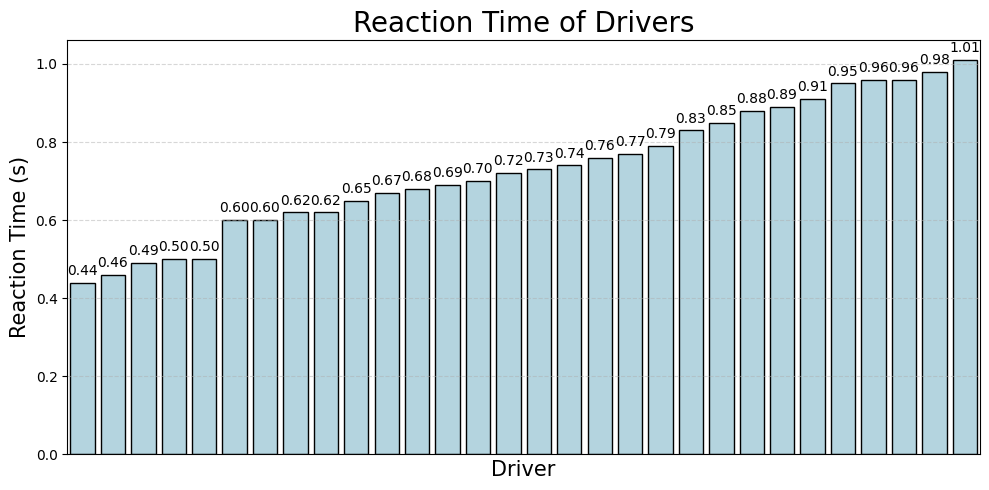

In [26]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = np.arange(1, 31), y = d, ax = ax, color = 'lightblue', edgecolor = 'black', linewidth = 1)

# Add labels to bars with values
for i, v in enumerate(d):
    ax.text(i + 0.5, v + 0.02, "{:.2f}".format(v) + " " * (4 - len("{:.2f}".format(v))), color = 'black', ha = 'right', fontsize = 10)

# Add y axis from 0 to 1.2 with 0.2 interval labels
plt.yticks(np.arange(0, 1.2, 0.2))

# Grid
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

# Remove xticks
plt.xticks([])

ax.set_title('Reaction Time of Drivers', fontsize = 20)

ax.set_xlabel('Driver', fontsize = 15)
ax.set_ylabel('Reaction Time (s)', fontsize = 15)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)
fig.savefig(f"plots/Reaction_Time_of_Drivers.png", dpi = 300, bbox_inches = 'tight', transparent = True)


Mean:  0.7316666666666668
Median:  0.725
Variance:  0.026653888888888883
Standard Deviation:  0.16326018770321465
Skewness:  -0.040838018027236994
Counter({'0.6-0.7': 8, '0.7-0.8': 7, '0.9-1.0': 5, '0.8-0.9': 4, '0.4-0.5': 3, '0.5-0.6': 2})


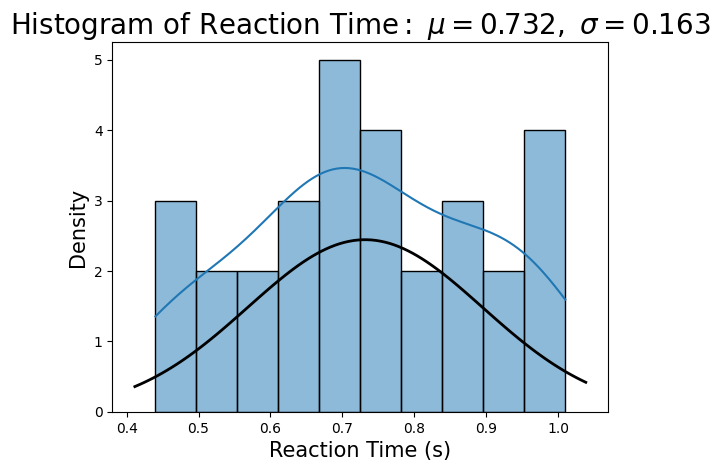

In [35]:

# Mean
print("Mean: ", np.mean(d))
# Median
print("Median: ", np.median(d))
# Variance
print("Variance: ", np.var(d))
# Standard Deviation
print("Standard Deviation: ", np.std(d))
# Skewness
print("Skewness: ", np.mean((d - np.mean(d))**3) / np.std(d)**3)

# How many are between 0.4-0.5, 0.5-0.6, 0.6-0.7, 0.7-0.8, 0.8-0.9, 0.9-1.0

c = Counter()
for i in d:
    if i < 0.5:
        c['0.4-0.5'] += 1
    elif i < 0.6:
        c['0.5-0.6'] += 1
    elif i < 0.7:
        c['0.6-0.7'] += 1
    elif i < 0.8:
        c['0.7-0.8'] += 1
    elif i < 0.9:
        c['0.8-0.9'] += 1
    elif i < 1.0:
        c['0.9-1.0'] += 1

print(c)

# Fit a normal distribution to the data:
mu, std = norm.fit(d)

# Plot the histogram.
# plt.hist(d, bins=10, density=True, alpha=0.6, color='b')
# Kde line color='blue', linewidth=2
sns.histplot(d, bins = 10, kde = True, edgecolor = 'black', linewidth = 1)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

# Add labels
plt.xlabel('Reaction Time (s)', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

plt.title(r'$\mathrm{Histogram\ of\ Reaction\ Time:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, std), fontsize = 20)

# Transparent background
plt.gcf().patch.set_alpha(0)

fig.tight_layout()

plt.savefig(f"plots/Reaction_Time_of_Drivers_Histogram.png", dpi = 300, bbox_inches = 'tight', transparent = True)

<BarContainer object of 6 artists>

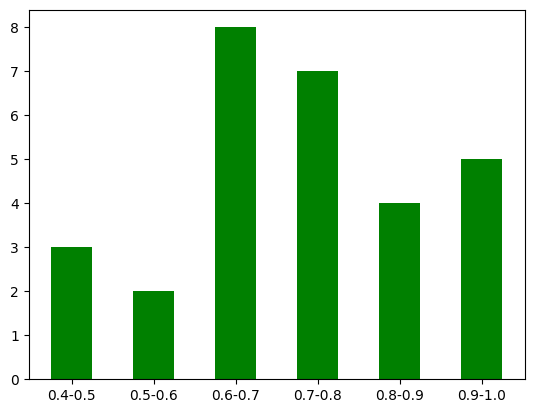

In [12]:
# Plot the histogram
plt.bar(c.keys(), c.values(), width=0.5, color='g')